In [101]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
advertising = pd.DataFrame(pd.read_csv(r"C:\\Users\\HP\\Downloads\\advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [105]:
#Data Inpection
advertising.shape

(200, 4)

In [107]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [109]:
advertising.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [111]:
#Data Cleaning and checking null values
advertising.isnull().sum()*100/advertising.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [113]:
#there was no null in the dataset so it was already clean

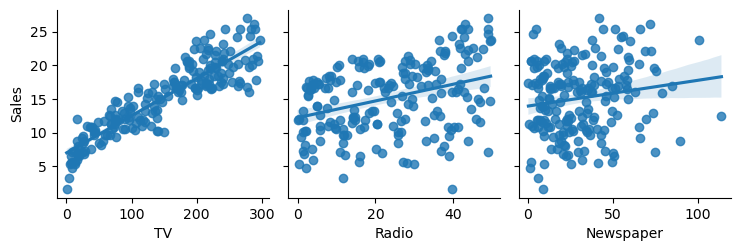

In [115]:
sns.pairplot(advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")


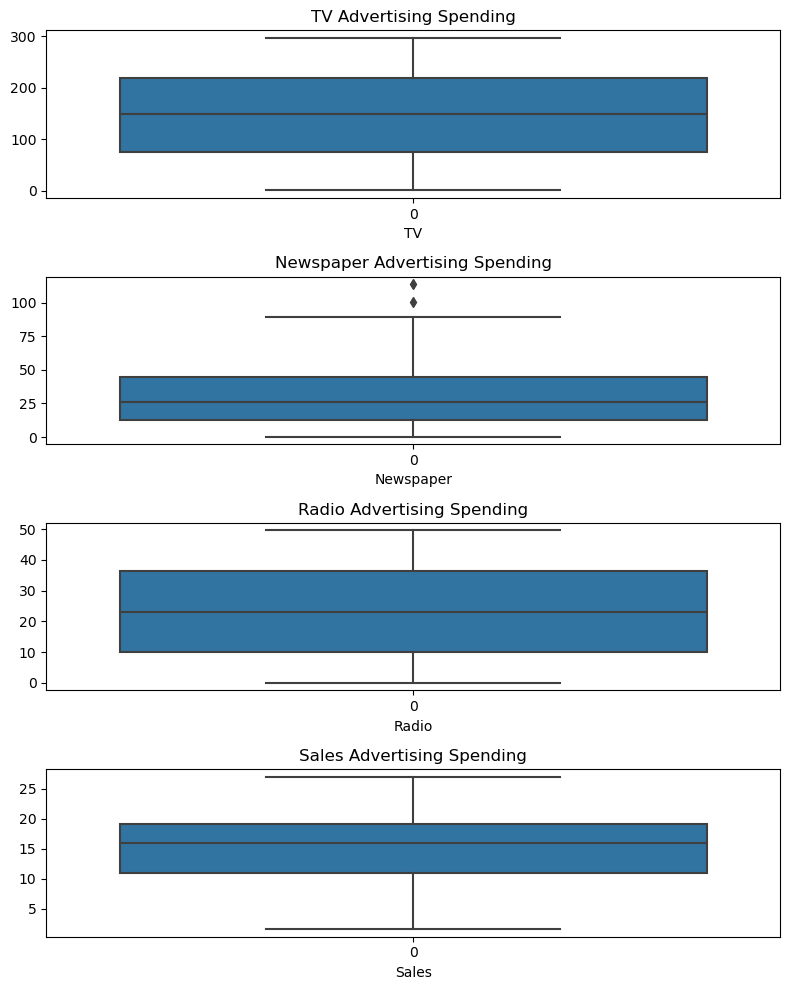

In [153]:

#outlier analysis


# Create subplots
fig, axs = plt.subplots(4, figsize=(8, 10))

# Boxplot for TV
sns.boxplot(advertising['TV'], ax=axs[0])
axs[0].set_title('TV Advertising Spending')
axs[0].set_xlabel('TV')


# Boxplot for Newspaper
sns.boxplot(advertising['Newspaper'], ax=axs[1])
axs[1].set_title('Newspaper Advertising Spending')
axs[1].set_xlabel('Newspaper')


# Boxplot for Radio
sns.boxplot(advertising['Radio'], ax=axs[2])
axs[2].set_title('Radio Advertising Spending')
axs[2].set_xlabel('Radio')


#boxplot for sales
sns.boxplot(advertising['Sales'], ax=axs[3])
axs[3].set_title('Sales Advertising Spending')
axs[3].set_xlabel('Sales')


plt.tight_layout()
plt.show()

# There is no considerable outliers present in the data.

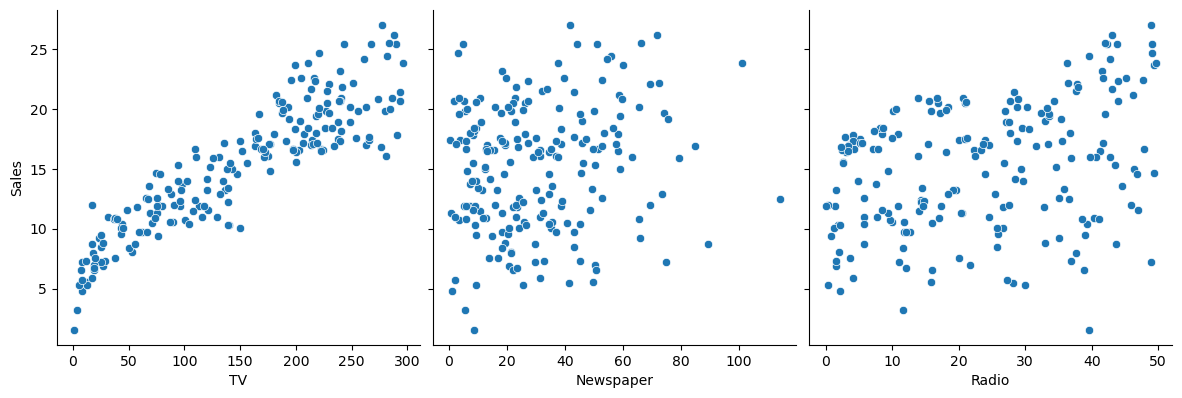

In [147]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars= 'Sales', height=4, aspect=1, kind='scatter')
plt.show()

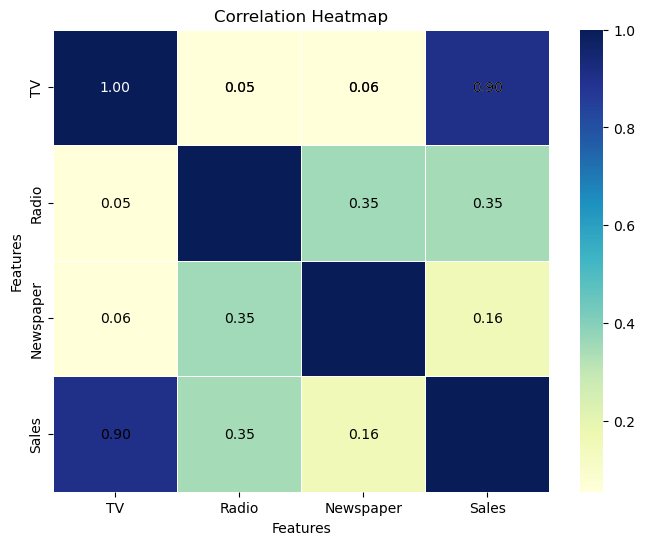

In [157]:
# Compute the correlation matrix
correlation_matrix = advertising.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

# Print correlation coefficients
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i != j:
         plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                  ha='center', va='center', color='black')

plt.show()


In [159]:
#Building model using STATSMODELS
X = advertising['TV']
y = advertising['Sales']

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [177]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [179]:
#now here we are building a linear model and to do that first we need to import statsmodels.api to perform linear regression.
import statsmodels.api as sm

In [181]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [183]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [185]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        19:17:37   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

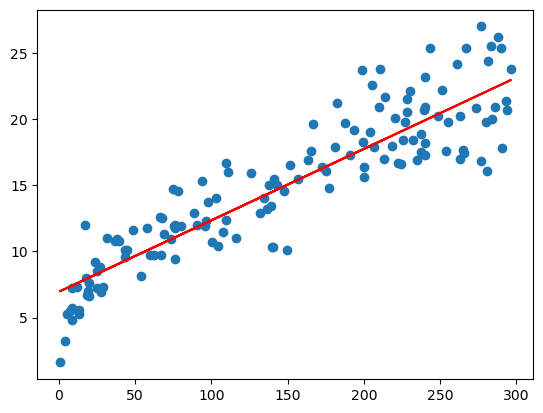

In [187]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [189]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

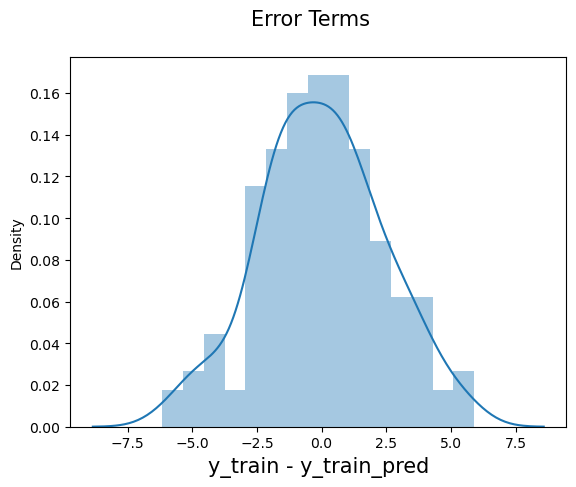

In [191]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

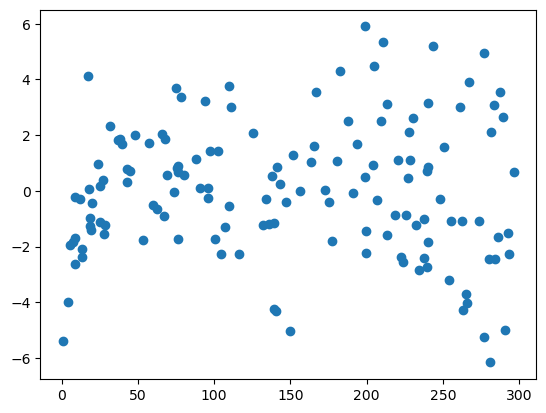

In [193]:
plt.scatter(X_train,res)
plt.show()

In [195]:
#Prediction on new dataset
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [197]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [199]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [201]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


2.019296008966232

In [203]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245659

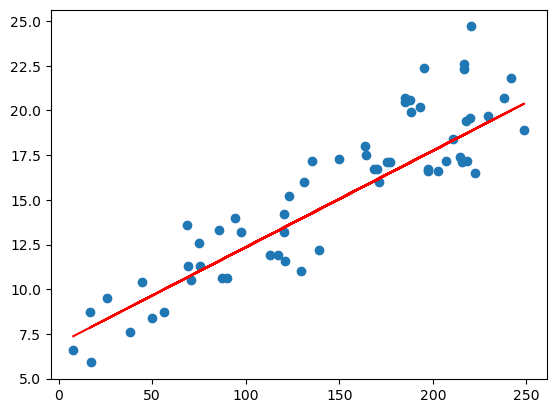

In [205]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()